In [447]:
import os

# Ignore numpy warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#%matplotlib notebook

# Use seaborn settings.
import seaborn as sns
sns.set(
        #context="paper",
        context="talk",
        #context="poster",
        style='darkgrid',
        #style="dark",
        #palette='deep',
        font='sans-serif', 
        #font_scale=1.0, 
        #color_codes=False, 
        rc={'figure.figsize': (12, 8.0)}, # width and height in inches.
)

import IPython

def _embed(src, width="800", height="400"):
    return IPython.display.IFrame(src=src, width=str(width), height=str(height))

from IPython.core.magic import (register_line_magic, register_cell_magic,
                                register_line_cell_magic)

@register_line_magic
def embed(line):
    "my line magic"
    #return line
    return _embed(line)


# We delete these to avoid name conflicts for automagic to work
del embed
#del lcmagic

# Theme
# import jtplot module in notebook
#from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
#jtplot.style(theme='monokai')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
#jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
#jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
#jtplot.reset()

from abipy import abilab
import abipy.data as abidata

si_pseudo = os.path.join(abidata.pseudo_dir, "14si.pspnc")

# Automating ABINIT calculations with AbiPy

### M. Giantomassi and the AbiPy group

Boston MA, 3 March 2019

<!-- link rel="stylesheet" href="reveal.js/css/theme/sky.css" id="theme" -->

<img src="./assets/intro_logos.png" width="85%" heigh="15%" align="center">

<hr> 

* These slides have been generated using [jupyter](https://jupyter.org), [nbconvert](https://github.com/jupyter/nbconvert) and [revealjs](https://revealjs.com/)

* The notebook can be downloaded from this [github repo](https://github.com/gmatteo/abipy_slides_aps_boston_2019)

* To install and configure the software, follow these [installation instructions](https://github.com/abinit/abipy#getting-abipy)


<img src="./assets/abipy_logo.jpg" width="55%" align="center">
<!-- img src="./assets/abinit_logo.jpg" width="45%" align="right"-->

## What is AbiPy?

#### Python package for:

   * Generating ABINIT input files automatically
   * Post-processing output results (*netcdf* and *text* files)
   * Interfacing ABINIT with external tools (e.g. [Vesta](http://jp-minerals.org/vesta/en/))
   * Creating and executing workflows (band structures, phonons, $GW$…)
   
#### Project:

* Developed and maintained by the ABINIT community
* Used by developers to validate, profile and optimize ABINIT
* Hosted on [github](https://github.com/abinit/abipy) 
* Release under the GPLv2 license

## Why python?

   * Easy to use and to learn
   * Great support for science ([numpy](http://www.numpy.org/), [scipy](https://www.scipy.org/), [pandas](http://pandas.pydata.org/), [matplotlib](https://matplotlib.org/) …)
   * Interactive environments ([ipython](http://ipython.org/), [jupyter notebooks](https://jupyter.org/), GUIs)
   * More powerful and flexible than Fortran for implementing the high-level logic needed in modern ab-initio workflows
   * [pymatgen](https://github.com/materialsproject) ecosystem and the [materials project database](https://www.materialsproject.org/)…
   
<img src="./assets/pydata_stack.png" width="65%" align="center">

## AbiPy design principles

* Extend the pymatgen code-base with ABINIT-specific objects
* Layered structure designed for different use-cases:
        
     * Post-processing tools and command-line interfaces
     * API to automate calculations and data analysis
     * High-throughput infrastructure ([abiflows](https://github.com/abinit/abiflows), [fireworks](https://github.com/materialsproject/fireworks), [mongodb](https://www.mongodb.com/))
     
* Closely connected to the ABINIT executable:

    * CPU-intensive algorithms performed by ABINIT (Fortran + MPI + OpenMP)
    * Glue code implemented in python
   
* ABINIT and AbiPy communicate through [netcdf](https://www.unidata.ucar.edu/software/netcdf/docs/) files

    * Portable binary format implemented in C
    * Fortran/Python bindings and support for parallel MPI-IO (HDF5)
    * [ETSF-IO specifications](https://www.etsf.eu/fileformats) for crystalline structures, wavefunctions, densities…

## How to install AbiPy

<!-- From the most simple to the most complex one, you have three options:-->

Using [pip](https://pypi.org/project/pip/) and python wheels:

        pip install abipy --user

Using [conda](https://conda.io/en/latest/) (*recommended*):

        conda install abipy --channel abinit 

From the [github repository](https://github.com/abinit/abipy) (*develop mode*):

        git clone https://github.com/abinit/abipy.git
        cd abipy 
        python setup.py develop
    
<!--
https://pypi.org/project/abipy/
https://anaconda.org/abinit/abipy
-->

<hr>

For further info see http://abinit.github.io/abipy/installation.html

## Why conda?


* Powerful package and environment management system for <u>any programming language</u>.
  Quite popular in the python community. Compatible with *pip install*.
      
* Precompiled libraries ➝ no compilation of C/Fortran/C++ code required:

        conda install netcdf 
        
* Less headaches when trying to install packages with many dependencies 

* <u>Isolated</u> and <u>reproducible</u> environments can be created easily
 
* Great tool for developers:
    
            conda create -n env3.7 python=3.7

* Most *conda* packages are friendly across Linux/MacOsX/Windows
  
* Tons of packages available on the [conda-forge](https://conda-forge.org/) channel
  
<hr>

### If you’re still not convinced about using conda...

## How to install Abinit on your laptop with conda

#### Download and install *miniconda* on your Linux machine with:

        wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
        bash Miniconda3-latest-Linux-x86_64.sh


#### Source your *.bashrc* file to activate the changes:


        source ~/.bashrc
    
#### Add *conda-forge* to your conda channels:

        conda config --add channels conda-forge

#### Install the parallel version of abinit from the [abinit channel](https://anaconda.org/abinit/abinit) with:


    conda install abinit --channel abinit

<hr>

Futher info at https://github.com/abinit/abiconda

## AbiPy documentation

<!--
* http://abinit.github.io/abipy/index.html

* Jupyter notebooks 
* Gallery of matplotlib examples and flows
* abitutorial github repo with additional examples


<img src="./assets/abipy_doc_homepage.png" width="100%" align="center">
-->

In [448]:
%embed https://abinit.github.io/abipy/index.html

##  Jupyter notebooks with [examples and lessons](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/index.ipynb) 

<!-- img src="./assets/abipy_notebooks.png" width="100%" align="center" -->

In [449]:
%embed https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/index.ipynb

## What do we need to automate calculations?

* Tools to parse and analyze output results
* python API to generate input files
* High-level logic for:

    * Managing complicated workflows
    * Exposing task parallelism (independent steps can be executed in parallel)
    * Handling runtime errors and restarting calculations
    * Saving final results in machine-readable format (e.g. databases)

<img src="./assets/sdata201865-f2.jpg" width="50%" align="center">

<hr>

### Let's discuss the different parts step by step…

<img src="./assets/Data-Analysis.jpg" width="95%" align="center">

## AbiPy post-processing tools

* Main entry point: 

  ```python
       from abipy import abilab
  abifile = abilab.abiopen("filename.nc")
  ```
        
  where *filename.nc* is a *netcdf* file (support also text files e.g. *run.abo*, *run.log*, *out_DDB*)

* *abifile* is the *AbiFile* subclass associated to the given file extension:

    1. GSR.nc ➝ *GsrFile*
    2. HIST.nc ➝ *HistFile*
    3. More than 45 file extensions supported (see `abiopen.py --help`) 
    

* Command line interface: use `abiopen.py FILE` to:

     * open the file inside the [*ipython*](https://ipython.org/) terminal
     * print info to terminal (`--print` option)
     * produce a predefined set of *matplotlib*  figures (`--expose` option)
     * generate [jupyter notebooks](https://jupyter.org/) (`--notebook` option)

#### Before we start, we need to import two AbiPy modules:

In [450]:
from abipy import abilab
import abipy.data as abidata

#### Now we can open our netcdf file with *abiopen*

In [451]:
gsr_kpath = abilab.abiopen("si_nscf_GSR.nc")

#### This function returns an *AbiFile* object provinding access to physical properties.

Conventions:

   * *abifile.structure* ➝ crystalline structure (subclass of pymatgen *Structure*)
   * *abifile.ebands* ➝ electron band energies
   * *abifile.ebands.kpoints* ➝ list of k-points (k-path, IBZ) 
   * *abifile.phbands* ➝ phonon frequencies and displacements
   
Several AbiPy objects provide *plot* methods returning [*matplotlib*](https://matplotlib.org/) figures

##### The *GsrFile* has a pymatgen *structure*:

In [452]:
print(gsr_kpath.structure)

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25

Abinit Spacegroup: spgid: 227, num_spatial_symmetries: 48, has_timerev: True, symmorphic: True


##### and one can easily convert the object to different formats:

In [453]:
print(gsr_kpath.structure.abi_string)

 natom 2
 ntypat 1
 typat 1 1
 znucl 14
 xred
    0.0000000000    0.0000000000    0.0000000000
    0.2500000000    0.2500000000    0.2500000000
 acell    1.0    1.0    1.0
 rprim
    6.3285005521    0.0000000000    3.6537614973
    2.1095001840    5.9665675402    3.6537614973
    0.0000000000    0.0000000000    7.3075229946


#### Band energies, occupation factors, k-points are stored in the *ebands* object 

In [454]:
print(gsr_kpath.ebands)

================================= Structure =================================
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25

Abinit Spacegroup: spgid: 227, num_spatial_symmetries: 48, has_timerev: True, symmorphic: True

Number of electrons: 8.0, Fermi level: 5.598 (eV)
nsppol: 1, nkpt: 14, mband: 8, nspinor: 1, nspden: 1
smearing scheme: none, tsmear_eV: 0.272, occopt: 1
Direct gap:
    Energy: 2.532 (eV)
    Initial state: spin=0, kpt=[+0.000, +0.000, +0.000], name: $\Gamma$, weight: 0.000, band=3, eig=5.598, occ=2.000
    Final state:   spin=0, kpt=[+0.000, +0.000, +0.000], name: $\Gamma$, weight: 0.000, band=4, eig=8.130, occ=0.000
Fundamental gap:
    Energy: 0.524 (eV)
    Initial state: spin=0, kpt=[+0.000, +0.000, +0.000], name: $\Gamma$, weight: 0.000, band=3, eig=5.598, occ=2.000
    F

#### The ebands object has a list of k-points that can be visualized with:

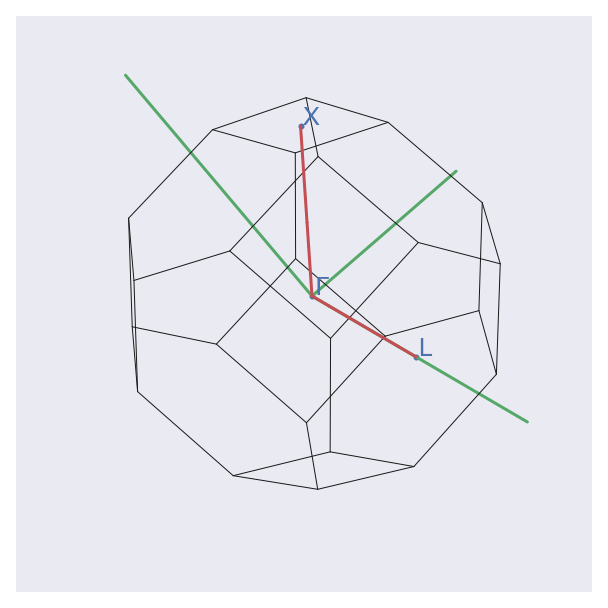

In [455]:
gsr_kpath.ebands.kpoints.plot();

#### To plot the band structure, use:

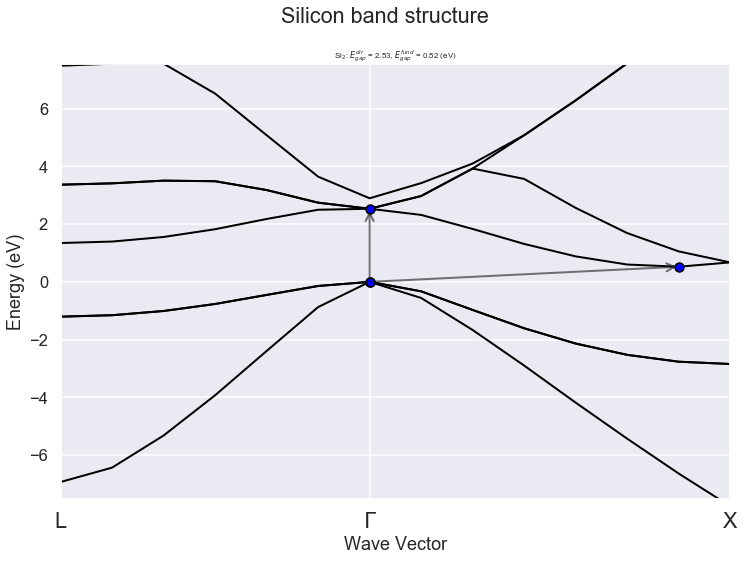

In [456]:
gsr_kpath.ebands.plot(with_gaps=True, title="Silicon band structure");

### Plot method accept several kwargs:

    * show = 
    * figsize 
    * a

#### Band energies can be given either along a k-path or in the irreducible Brillouin zone (IBZ):

In [457]:
with abilab.abiopen("si_scf_GSR.nc") as scf_gsr:
    ebands_kmesh = scf_gsr.ebands
    print(ebands_kmesh.kpoints)

K-mesh with divisions: [8, 8, 8], shifts: [0.0, 0.0, 0.0]
kptopt: 1 (Use space group symmetries and TR symmetry)
Number of points in the IBZ: 29
     0) [+0.000, +0.000, +0.000],  weight=0.002
     1) [+0.125, +0.000, +0.000],  weight=0.016
     2) [+0.250, +0.000, +0.000],  weight=0.016
     3) [+0.375, +0.000, +0.000],  weight=0.016
     4) [+0.500, +0.000, +0.000],  weight=0.008
     5) [+0.125, +0.125, +0.000],  weight=0.012
     6) [+0.250, +0.125, +0.000],  weight=0.047
     7) [+0.375, +0.125, +0.000],  weight=0.047
     8) [+0.500, +0.125, +0.000],  weight=0.047
     9) [-0.375, +0.125, +0.000],  weight=0.047
    10) [-0.250, +0.125, +0.000],  weight=0.047
    ... (More than 10 k-points)


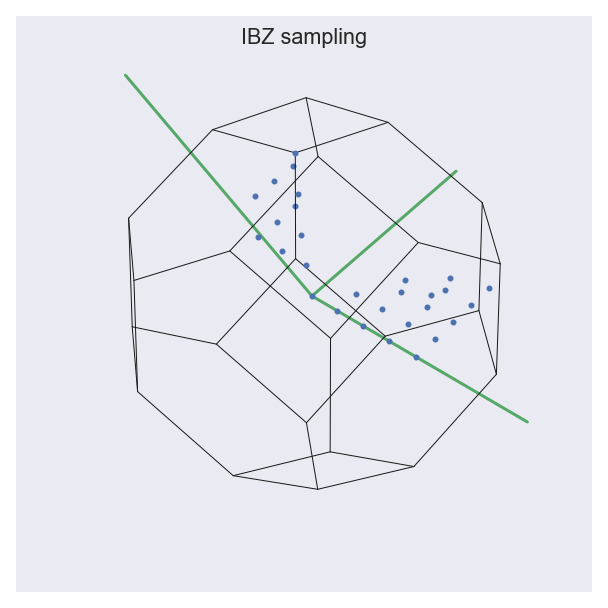

In [458]:
ebands_kmesh.kpoints.plot(title="IBZ sampling");

#### To compute the density of states (DOS), we need energies in the IBZ:

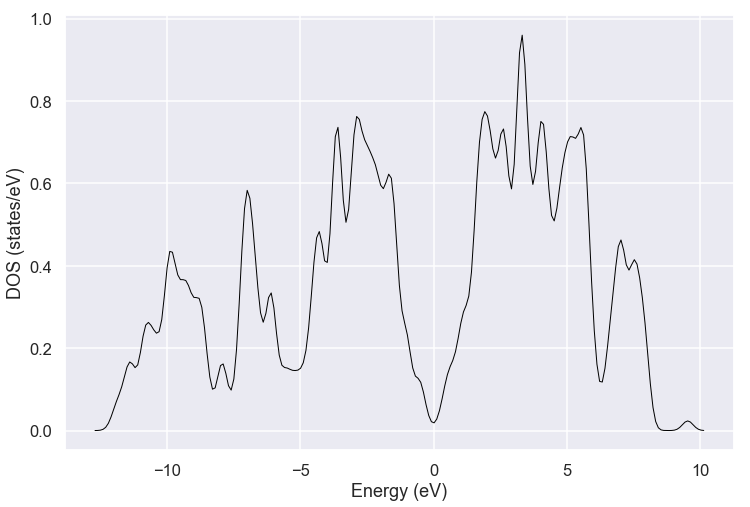

In [459]:
edos = ebands_kmesh.get_edos()
edos.plot();

#### Plotting bands with DOS is easy:

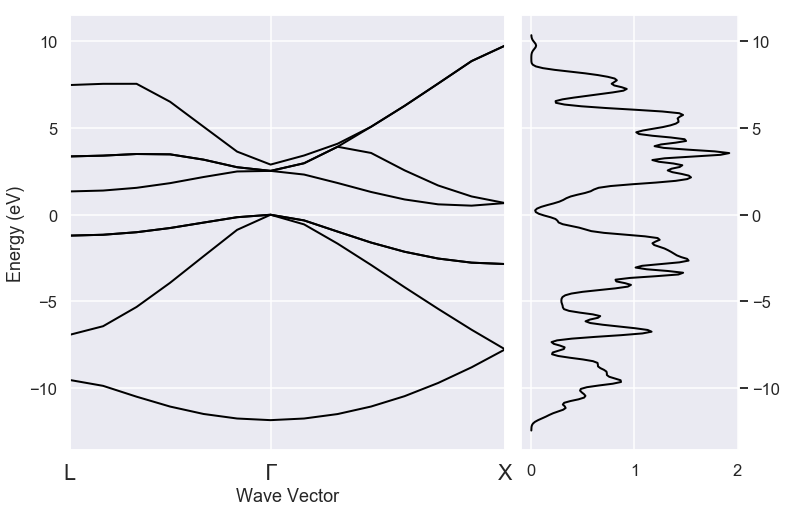

In [460]:
gsr_kpath.ebands.plot_with_edos(edos);

#### Use *ElectronBandsPlotter* to visualize multiple band structures:

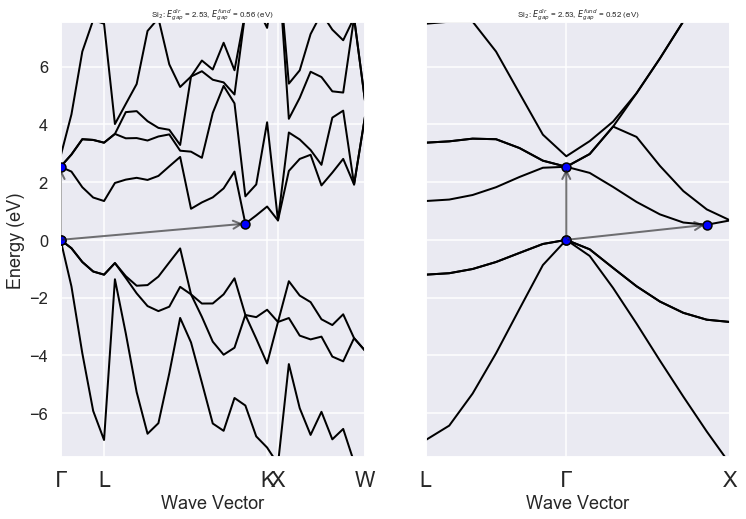

In [461]:
plotter = abilab.ElectronBandsPlotter()
plotter.add_ebands(label="BZ sampling", bands="si_scf_GSR.nc")
plotter.add_ebands(label="k-path", bands="si_nscf_GSR.nc")
plotter.gridplot(with_gaps=True);

##### We can also compute the DOS with the gaussian method and different broadening values

In [462]:
edos_plotter = ebands_kmesh.compare_gauss_edos(widths=[0.2, 0.3, 0.4], step=0.1)

##### and plot the results on the same figure with:

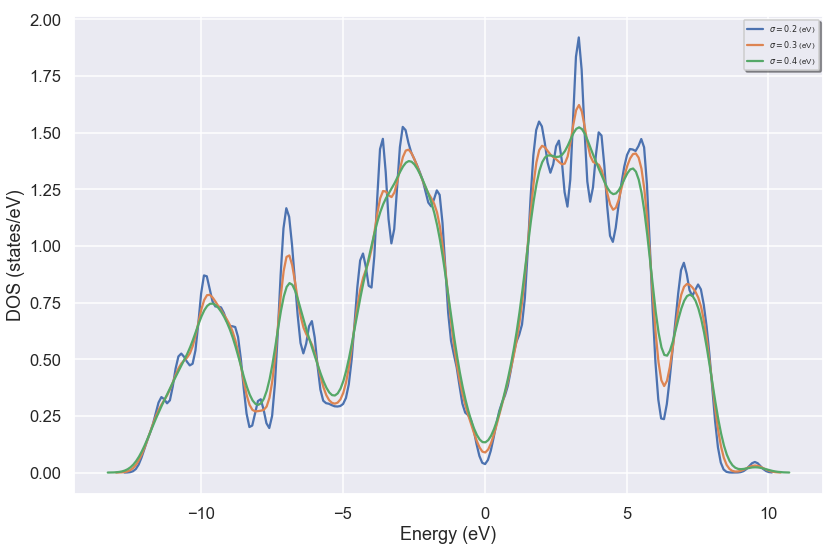

In [463]:
edos_plotter.combiplot(tight_layout=True);

#### while *gridplot* shows the results in a grid:

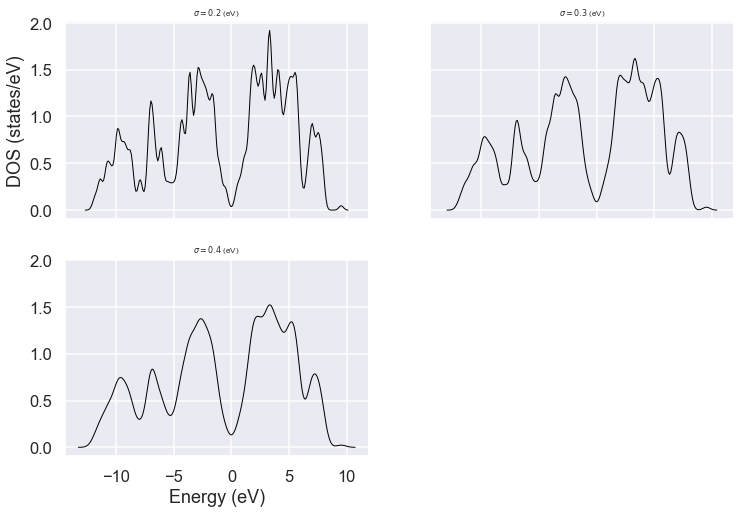

In [464]:
edos_plotter.gridplot();

## Other files supported by AbiPy

* *GSR.nc* ➝ Ground-state results produced by SCF/NSCF runs
* *HIST.nc* ➝ Structural relaxation and molecular dynamics
* *FATBANDS.nc* ➝ Fatbands and LM-projected DOS for electrons
* *DDB*: ➝ dynamical matrix, Born effective charges, elastic constants…
* *SIGRES.nc* ➝ $GW$ calculations ($\Sigma^{e-e}$ self-energy)
* *MDF.nc* ➝ Bethe-Salpeter calculations
* *ABIWAN.nc* ➝ *netcdf* file produced by Abinit with wannier90 results 
* *SIGEPH.nc* ➝ electron-phonon self-energy ($\Sigma^{e-ph}$)
* …

#### Jupter notebooks with examples available  [here](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/index.ipynb#Output-files-supported-by-AbiPy)

## Abipy Robots

* High-level interface to operate on <u>multiple files</u> with the same file extension

* Useful for:

     * convergence studies
     * producing multiple plots
     * building [Pandas dataframes](https://pandas.pydata.org/) (data in tabular format powered by python)

* Each *Robot* is associated to a file extension, *e.g.* 

     * GSR.nc ➝ *GsrRobot*
     * DDB ➝ *DdbRobot*
     
* *Robots* can be constructed from:

    1. List of filenames
    2. Directories and regular expressions
    
* Command line interface provided by the *abicomp.py* script:

* To generate notebook to compare multiple *GSR* files, use:

            abicomp.py gsr out1_GSR.nc  out2_GSR.nc --notebook

## Our first example with the GsrRobot

#### We have a directory with a bunch of  *GSR.nc* files and we need to analyze the results:

In [465]:
ls flow_base3_ngkpt

out0_GSR.nc  out1_GSR.nc  out2_GSR.nc  out3_GSR.nc


##### Let's construct a  *GsrRobot* with:

In [466]:
robot_enekpt = abilab.GsrRobot.from_dir("flow_base3_ngkpt");

##### Files can be accessed with list-like or dict-like syntax:

In [467]:
robot_enekpt.abifiles[0]

<GsrFile, flow_base3_ngkpt/out0_GSR.nc>

In [468]:
robot_enekpt["out0_GSR.nc"]

<GsrFile, flow_base3_ngkpt/out0_GSR.nc>

#### Now we can use the robot methods to build pandas *DataFrames*:


In [469]:
ene_table = robot_enekpt.get_dataframe()
print(ene_table.keys())

Index(['formula', 'natom', 'alpha', 'beta', 'gamma', 'a', 'b', 'c', 'volume',
       'abispg_num', 'spglib_symb', 'spglib_num', 'spglib_lattice_type',
       'energy', 'pressure', 'max_force', 'ecut', 'pawecutdg', 'tsmear',
       'nkpt', 'nsppol', 'nspinor', 'nspden'],
      dtype='object')


#### Jupyter knows how to visualize *DataFrames*:

In [470]:
ene_table

,formula,natom,alpha,beta,gamma,a,b,c,volume,abispg_num,...,energy,pressure,max_force,ecut,pawecutdg,tsmear,nkpt,nsppol,nspinor,nspden
out0_GSR.nc,Si2,2,60.0,60.0,60.0,3.866975,3.866975,3.866975,40.888292,227,...,-241.251546,-3.586342,3.051564e-27,8.0,-1.0,0.01,2,1,1,1
out1_GSR.nc,Si2,2,60.0,60.0,60.0,3.866975,3.866975,3.866975,40.888292,227,...,-241.417959,-3.907310,4.677360e-27,8.0,-1.0,0.01,10,1,1,1
out2_GSR.nc,Si2,2,60.0,60.0,60.0,3.866975,3.866975,3.866975,40.888292,227,...,-241.421158,-3.895679,0.000000e+00,8.0,-1.0,0.01,28,1,1,1
out3_GSR.nc,Si2,2,60.0,60.0,60.0,3.866975,3.866975,3.866975,40.888292,227,...,-241.421391,-3.895437,2.762091e-27,8.0,-1.0,0.01,60,1,1,1


In [471]:
ene_table[["energy", "pressure"]]

,energy,pressure
out0_GSR.nc,-241.251546,-3.586342
out1_GSR.nc,-241.417959,-3.907310
out2_GSR.nc,-241.421158,-3.895679
out3_GSR.nc,-241.421391,-3.895437


#### Dataframes are great as we can use python to operate on the data:

In [472]:
ene_table.sort_values(by="nkpt", inplace=True)

# Add 2 columns with energies in Ha and difference wrt to the last point.
ene_table["energy_Ha"] = ene_table["energy"] * abilab.units.eV_to_Ha
ene_table["ediff_Ha"] = ene_table["energy_Ha"] - ene_table["energy_Ha"][-1]

# Select columns with the syntax:
ene_table[["nkpt", "energy", "energy_Ha", "ediff_Ha"]]

,nkpt,energy,energy_Ha,ediff_Ha
out0_GSR.nc,2,-241.251546,-8.865831,0.006242
out1_GSR.nc,10,-241.417959,-8.871946,0.000126
out2_GSR.nc,28,-241.421158,-8.872064,0.000009
out3_GSR.nc,60,-241.421391,-8.872073,0.000000


* Dataframes can be exported to different formats: CSV, $Latex$, JSON, Excel, ...
* High-level plotting interface provided by [seaborn](https://seaborn.pydata.org/)
* Explore your *DataFrames* inside *jupyter* with [qgrid](https://github.com/quantopian/qgrid)
* Use [ene_table.to_clipboard()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_clipboard.html#pandas-dataframe-to-clipboard) 
to copy to clipboard and paste into spreadsheet editor

#### We can also use the pandas built-in API to plot the data with matplotlib:

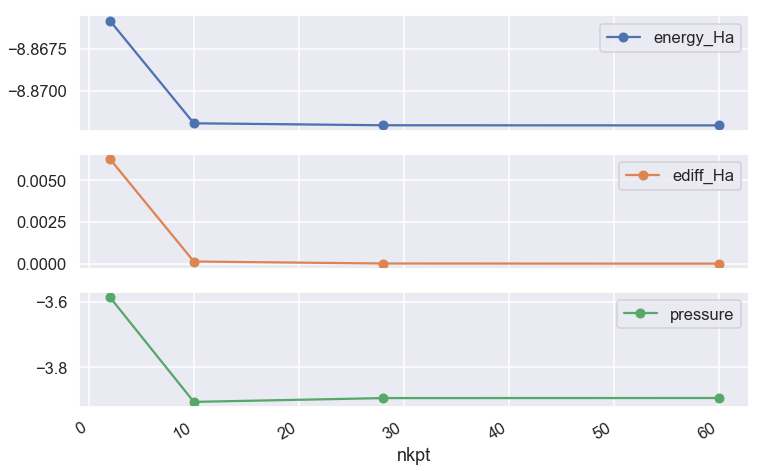

In [473]:
ene_table.plot(x="nkpt", y=["energy_Ha", "ediff_Ha", "pressure"], 
               style="-o", subplots=True);


* Command line interface provided by the [abicomp.py script](https://abinit.github.io/abipy/scripts/abicomp.html) 

* See also [lesson_base3](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/base3/lesson_base3.ipynb:)

#### or pass a function to compute the values  along the x-axis and sort the results:
<!-- The docstring of the function will be used as label of the x-axis: -->

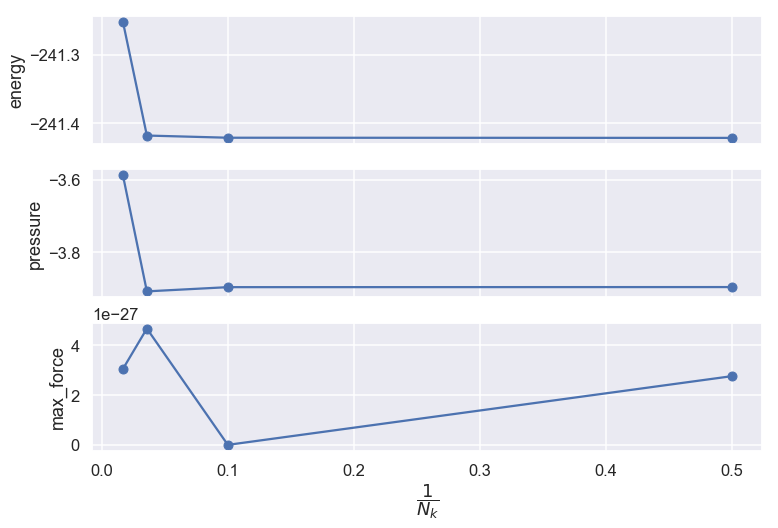

In [474]:
def inv_nkpt(abifile):
    r"""$\dfrac{1}{N_{k}}$"""
    return 1.0 / abifile.nkpt
    
robot_enekpt.plot_gsr_convergence(sortby=inv_nkpt);    

### Post-processing the DFPT results available in the MP database

* More than 1500 DFPT calculations done with abiflows ([Petretto et al.](https://www.nature.com/articles/sdata201865))
* Results available on the materials project website (including the *DDB* files) 

<hr>

Let's assume we want to reuse the raw data for our research work:

   * Handling 1500 tabs in the web browser is not feasible
   * We need a <u>programmatic</u> interface to automate stuff. 

With python we can easily connect the different parts of the puzzle:

* REST API to get the raw data (*DDB*) from the MP database
* Computation of phonons, thermodinamical properties, Born effective charges, dielectric tensor, IR spectrum with ABINIT
* Post-processing with AbiPy

For a more comprehensive discussion see this 
[abitutorial](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/ddb.ipynb)

<!--
The results for the rocksalt phase of MgO are available at https://materialsproject.org/materials/mp-1009129/
-->

#### To download a DDB file from the materials project database:

In [475]:
ddb = abilab.DdbFile.from_mpid("mp-1009129")
print(ddb)

================================= File Info =================================
Name: mp-1009129qy153fif_DDB
Directory: /var/folders/89/47k8wfdj11x035svqf8qnl4m0000gn/T
Size: 218.73 kb
Access Time: Fri Mar  1 15:43:15 2019
Modification Time: Fri Mar  1 15:43:15 2019
Change Time: Fri Mar  1 15:43:15 2019

================================= Structure =================================
Full Formula (Mg1 O1)
Reduced Formula: MgO
abc   :   2.908638   2.908638   2.656848
angles:  90.000000  90.000000 120.000000
Sites (2)
  #  SP           a         b    c
---  ----  --------  --------  ---
  0  Mg    0         0         0
  1  O     0.333333  0.666667  0.5

Abinit Spacegroup: spgid: 0, num_spatial_symmetries: 12, has_timerev: True, symmorphic: False

================================== DDB Info ==================================

Number of q-points in DDB: 72
guessed_ngqpt: [ 9  9 10] (guess for the q-mesh divisions made by AbiPy)
ecut = 44.000000, ecutsm = 0.000000, nkpt = 405, nsym = 12, usepaw

#### Once we have a *DdbFile* object, we can call *anaddb* to compute phonon bands and DOS:

In [476]:
# Return PHBST and PHDOS netcdf files.
phbstnc, phdosnc = ddb.anaget_phbst_and_phdos_files(
    ndivsm=20, nqsmall=20, lo_to_splitting=True, asr=2, 
    chneut=1, dipdip=1, dos_method="tetra")

#### and extract the phonon bands and the phonon DOS objects with:

In [477]:
phbands = phbstnc.phbands
phdos = phdosnc.phdos

In [478]:
print(phbands)

================================= Structure =================================
Full Formula (Mg1 O1)
Reduced Formula: MgO
abc   :   2.908638   2.908638   2.656848
angles:  90.000000  90.000000 120.000000
Sites (2)
  #  SP           a         b    c
---  ----  --------  --------  ---
  0  Mg    0         0         0
  1  O     0.333333  0.666667  0.5

Abinit Spacegroup: spgid: 0, num_spatial_symmetries: 12, has_timerev: True, symmorphic: False

Number of q-points: 345
Atomic mass units: {12.0: 24.305, 8.0: 15.9994}
Has non-analytical contribution for q --> 0: True


#### To plot the q-path:

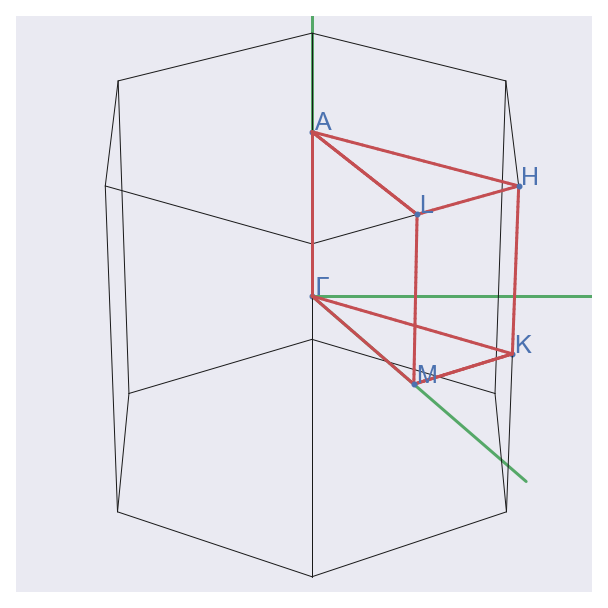

In [479]:
phbands.qpoints.plot();

#### To plot the phonon band structure including LO-TO splitting:

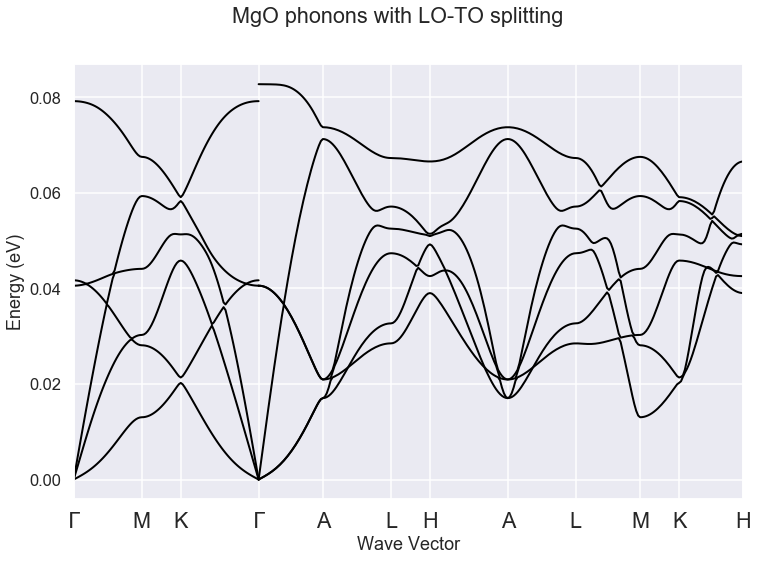

In [480]:
phbands.plot(title="MgO phonons with LO-TO splitting");

#### To plot the DOS and the integrated density of states (IDOS):

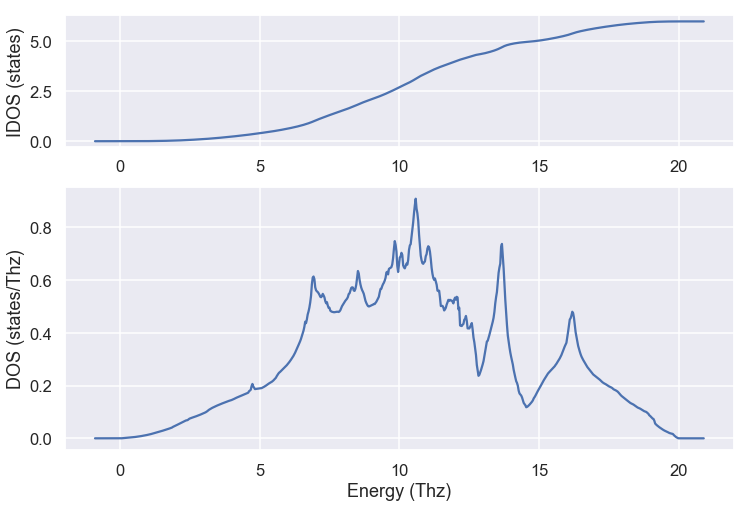

In [481]:
phdos.plot(units="Thz");

#### We can also plot the phonon bands and the DOS on the same figure with:

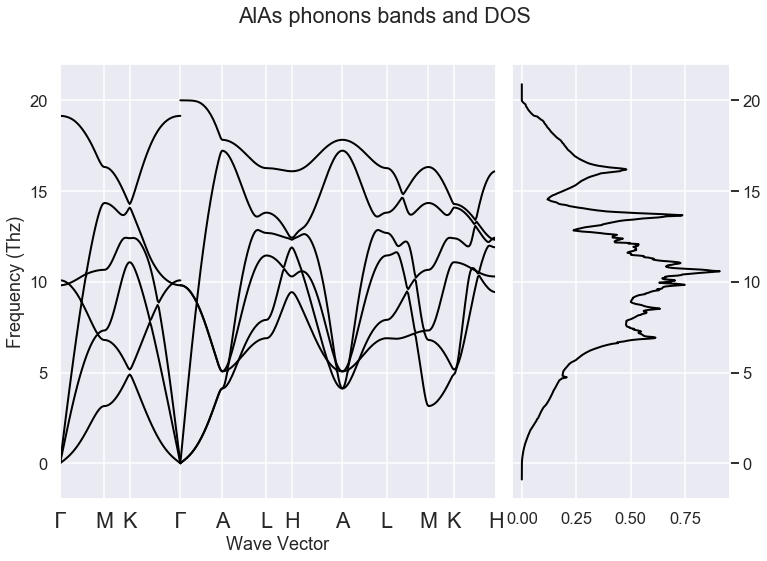

In [482]:
phbands.plot_with_phdos(phdos, units="Thz", title="AlAs phonons bands and DOS");

#### Thermodynamic properties as function of temperature T:

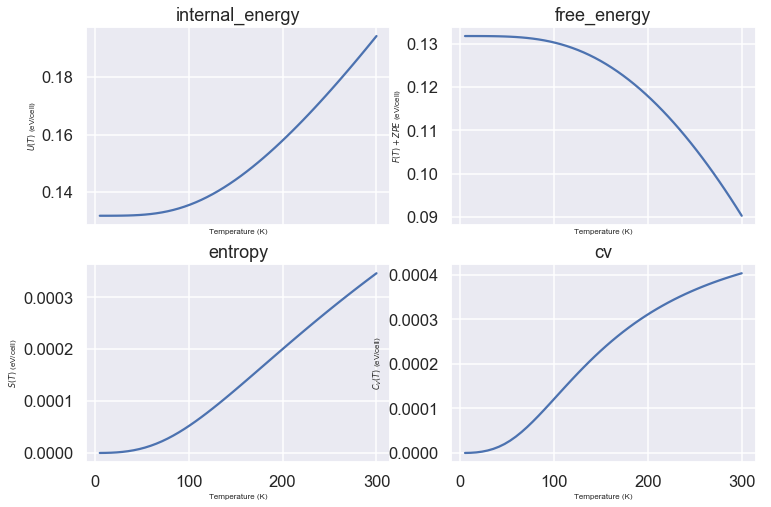

In [483]:
phdos.plot_harmonic_thermo();

## How to use DdbRobot to perform convergence studies

<!--
We have performed DFPT calculations for a metallic system ($MgB_2$) and we 
are interested in the effect of the k-sampling and the smearing on the vibrational properties.
-->
##### Let's use the *DdbRobot* to compare phonons obtained with different k-meshes and smearing values:

In [484]:
paths = [
    "mgb2_888k_0.01tsmear_DDB",
    "mgb2_888k_0.04tsmear_DDB",
    "mgb2_121212k_0.01tsmear_DDB",
    "mgb2_121212k_0.04tsmear_DDB",
]

paths = [os.path.join(abidata.dirpath, "refs", "mgb2_phonons_nkpt_tsmear", f) 
         for f in paths]

robot = abilab.DdbRobot()
for i, path in enumerate(paths):
    robot.add_file(path, path)

In [485]:
# Define function to change labels:
func = lambda ddb: "nkpt: %s, tsmear: %.2f" % (
    ddb.header["nkpt"], ddb.header["tsmear"])

robot.remap_labels(func)
robot

Label                    Relpath
-----------------------  -----------------------------------------------------------------------------
nkpt: 256, tsmear: 0.01  ../abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_888k_0.01tsmear_DDB
nkpt: 256, tsmear: 0.04  ../abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_888k_0.04tsmear_DDB
nkpt: 864, tsmear: 0.01  ../abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_121212k_0.01tsmear_DDB
nkpt: 864, tsmear: 0.04  ../abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_121212k_0.04tsmear_DDB

<!-- We are usually interested in the convergence behavior with respect to one or two parameters of 
the calculations.-->

#### Now we can build a dataframe with the most important parameters:

In [486]:
robot.get_params_dataframe()

,nkpt,nsppol,ecut,tsmear,occopt,ixc,nband,usepaw
"nkpt: 256, tsmear: 0.01",256,1,35.0,0.01,4,1,8,0
"nkpt: 256, tsmear: 0.04",256,1,35.0,0.04,4,1,8,0
"nkpt: 864, tsmear: 0.01",864,1,35.0,0.01,4,1,8,0
"nkpt: 864, tsmear: 0.04",864,1,35.0,0.04,4,1,8,0


#### and check that all DDBs have been computed with the same crystalline structure:

In [487]:
robot.get_lattice_dataframe()

,formula,natom,alpha,beta,gamma,a,b,c,volume,abispg_num,spglib_symb,spglib_num,spglib_lattice_type
"nkpt: 256, tsmear: 0.01",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal
"nkpt: 256, tsmear: 0.04",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal
"nkpt: 864, tsmear: 0.01",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal
"nkpt: 864, tsmear: 0.04",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal


#### To analyze the effect of the k-sampling and of the smearing on the vibrational properties:

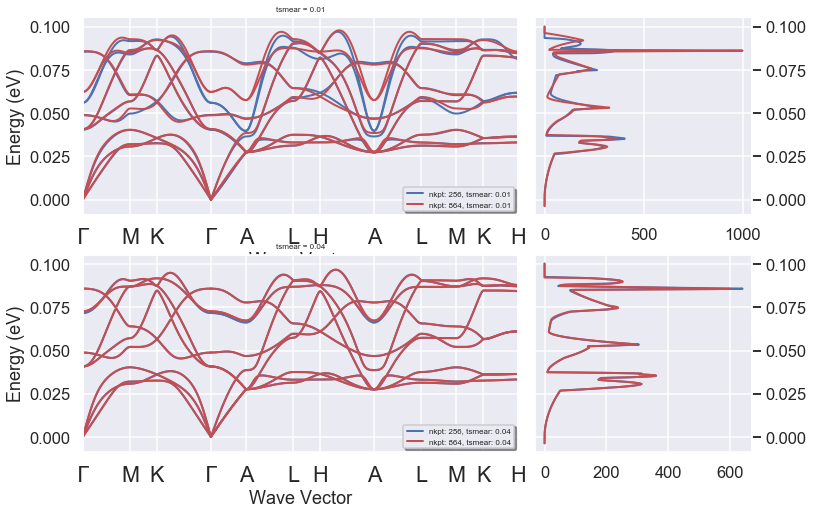

In [488]:
# Invoke anaddb and store results
r = robot.anaget_phonon_plotters(nqsmall=2)

r.phbands_plotter.gridplot_with_hue("tsmear", with_dos=True);

## Phonon and thermodynamical properties on the Materials Project database

* Phonon frequencies and displacements
* Thermodynamic quantities
* Born Effective Charges    
* Dielectric Tensor
* Abinit DDB files

### Computation details

PBEsol norm-conserving pseudopotentials (PseudoDojo v0.3)

The plane wave cutoff is chosen based on the hardest element for each compound, according to the values suggested in the PseudoDojo table. The Brillouin zone has been sampled using equivalent k-point and q-point grids that respect the symmetries of the crystal with a density of approximately 1500 points per reciprocal atom and the q-point grid is always Γ-centered [9].

All the structures are relaxed with strict convergence criteria, i.e. until all the forces on the atoms are below 10-6 Ha/Bohr and the stresses are below 10-4 Ha/Bohr3.

The primitive cells and the band structures are defined according to the conventions of Setyawan and Curtarolo [10].

#### Python code to visualize electronic and vibrational properties from the MP database:

In [489]:
def plot_electrons_and_phonons(mpids):
    # Construct AbiPy ebands from mpids
    ebands_list = [abilab.ElectronBands.from_mpid(mpid) for mpid in mpids]

    # Get DDB files from the MP website and run anaddb to get phonon bands.
    phbands_list = []
    for i, mpid in enumerate(mpids):
        ddb = abilab.DdbFile.from_mpid(mpid)
        # Call anaddb to compute phonon bands
        phbst, _ = ddb.anaget_phbst_and_phdos_files(nqsmall=0)
        phbands_list.append(phbst.phbands)
        phbst.close()

    # Build matplotlib grid. The figure has (len(mpids), 2) subplots
    nrows, ncols = len(mpids), 2
    ax_mat, fig, plt = abilab.get_axarray_fig_plt(None, nrows=nrows, ncols=ncols,
                                                  sharex=False, sharey=False, 
                                                  squeeze=False)
    
    for i, (ebands, phbands) in enumerate(zip(ebands_list, phbands_list)):
        ebands.plot(ax=ax_mat[i, 0], with_gaps=True, ylims=(-5, 10), 
                    max_phfreq=phbands.maxfreq, show=False)
        phbands.plot(ax=ax_mat[i, 1], show=False)
        
        # Hide labels
        ax_mat[i, 1].yaxis.label.set_visible(False)
        if i != len(ebands_list) - 1:
            for ax in ax_mat[i]: ax.xaxis.label.set_visible(False)

    return fig

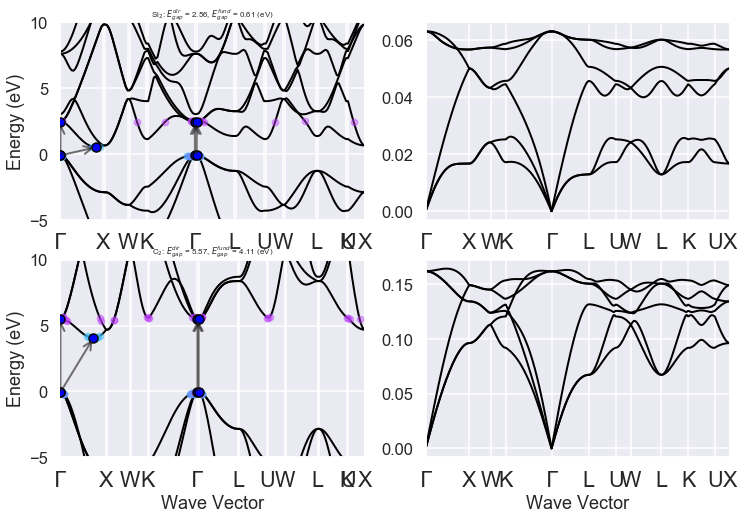

In [490]:
plot_electrons_and_phonons(mpids=["mp-149", "mp-66"]); # Si and Diamond

##### Qualitative analysis of possible e-ph scattering channels with less than 20 lines of code!

# How to automate input file generation with AbiPy

<img src="./assets/automate_input_files.jpg" width="85%" align="center">

## *AbinitInput* object 

Programmatic interface to generate input files:

* *Dict-like* object storing ABINIT variables 
* Methods to set multiple variables (*e.g.* **k**-path from *structure*)
* Factory functions to generate input files with minimal effort

Can invoke ABINIT to get important parameters such as:

  * list of **k**-points in the IBZ
  * list of irreducible DFPT perturbations
  * list of possible configurations for MPI jobs (*npkpt*, *npfft*, *npband* …)
     
#### To build an input, we need a *structure* and a list of *pseudos*:

In [491]:
inp = abilab.AbinitInput(structure="si.cif", pseudos="14si.pspnc")

#### Low-level API (should look familiar to Abinit users):

In [492]:
inp["ecut"] = 8
"ecut" in inp

True

#### Use *set_vars* to set the value of several variables with a single call:

In [493]:
inp.set_vars(kptopt=1, ngkpt=[2, 2, 2],  
             shiftk=[0.0, 0.0, 0.0, 0.5, 0.5, 0.5]  # 2 shifts in one list
            );

#### althought it's much easier to use:

In [494]:
inp.set_autokmesh(nksmall=2)

{'ngkpt': array([2, 2, 2]),
 'kptopt': 1,
 'nshiftk': 4,
 'shiftk': array([[0.5, 0.5, 0.5],
        [0.5, 0. , 0. ],
        [0. , 0.5, 0. ],
        [0. , 0. , 0.5]])}

####  The method builds a homogeneous k-mesh from metavariables:

* *nksmall* is the number of divisions used to sample the smallest lattice vector
* *shiftk* is automatically selected from an internal database.

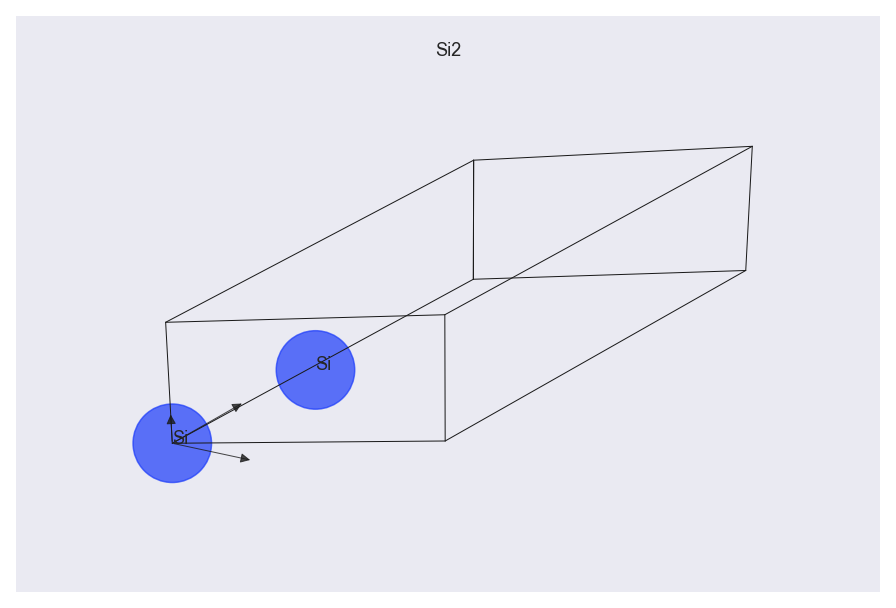

In [495]:
inp.structure.plot();

#### An *AbinitInput* has a structure object 

In [496]:
print(inp.structure.formula)

Si2


#### and a list of pseudopotentials

In [497]:
for pseudo in inp.pseudos:
    print(pseudo)

<NcAbinitPseudo: 14si.pspnc>
  summary: Troullier-Martins psp for element  Si        Thu Oct 27 17:31:21 EDT 1994
  number of valence electrons: 4.0
  maximum angular momentum: d
  angular momentum for local part: d
  XC correlation: LDA_XC_TETER93
  supports spin-orbit: False
  radius for non-linear core correction: 1.80626423934776
  hint for low accuracy: ecut: 0.0, pawecutdg: 0.0
  hint for normal accuracy: ecut: 0.0, pawecutdg: 0.0
  hint for high accuracy: ecut: 0.0, pawecutdg: 0.0


#### Pseudos from the [PseudoDojo project](http://www.pseudo-dojo.org/) provide hints for the cutoff energy.

In [498]:

from pseudo_dojo.core.pseudos import OfficialDojoTable
pseudo_table = OfficialDojoTable.from_dojodir('ONCVPSP-PBEsol-PDv0.4','standard')

#### Inside the notebook, one gets the HTML representation with links to the documentation:

In [499]:
inp

<AbinitInput at 121093015592>

#### To generate a high-symmetry k-path (taken from an internal database)

In [500]:
inp.set_kpath(ndivsm=10)

{'kptbounds': array([[0.   , 0.   , 0.   ],
        [0.5  , 0.   , 0.5  ],
        [0.5  , 0.25 , 0.75 ],
        [0.375, 0.375, 0.75 ],
        [0.   , 0.   , 0.   ],
        [0.5  , 0.5  , 0.5  ],
        [0.625, 0.25 , 0.625],
        [0.5  , 0.25 , 0.75 ],
        [0.5  , 0.5  , 0.5  ],
        [0.375, 0.375, 0.75 ],
        [0.625, 0.25 , 0.625],
        [0.5  , 0.   , 0.5  ]]), 'kptopt': -11, 'ndivsm': 10, 'iscf': -2}

* Ten points to sample the smallest segment of the **k**-path
* Other segments are sampled so that proportions are preserved

### Inside jupyter, one can get the HTML documentation with:

In [501]:
abilab.docvar("ecut")

ecut  <Energy CUToff>

## Interfacing Abinit with Python via *AbinitInput*

* Once we have an *AbinitInput*, it is possible to execute Abinit to:

    * get useful information from the Fortran code (e.g. IBZ, space group…)
    * validate the input file before running the calculation 
        
* Methods invoking Abinit start with the *abi* prefix followed by a verb: 

    * *inp.abiget_irred_phperts(...)* 
    * *inp.abivalidate()*

#### Important: 

* To call Abinit from AbiPy, one has to prepare a configuration file (*manager.yml*)
  providing all the information required to execute/submit Abinit jobs: 

     * `$PATH`, `$LD_LIBRARY_PATH`
     * modules
     * python environment


* For futher info consult the [documentation](https://abinit.github.io/abipy/workflows/taskmanager.html)



## Example of *manager.yml* for laptops (shell adapter)
<hr>

```yaml

qadapters:
  # List of qadapters objects 
  - priority: 1 
    queue:
      qtype: shell
      qname: localhost
    job:
       mpi_runner: mpirun
       pre_run: 
           # abinit exec must be in $PATH
           - export PATH=$HOME/git_repos/abinit/_build/src/98_main:$PATH
    limits:
       timelimit: 30:00
       max_cores: 2
    hardware:
       num_nodes: 2
       sockets_per_node: 1
       cores_per_socket: 2
       mem_per_node: 4Gb
```

* Examples of configuration files for clusters are available [here](https://abinit.github.io/abipy/workflows/manager_examples.html)

* Use *abirun.py doc_manager* to get documentation inside the shell

## An example for a Slurm-based cluster
<hr>

```yaml

hardware: &hardware
   num_nodes: 80
   sockets_per_node: 2
   cores_per_socket: 12
   mem_per_node: 95Gb

job: &job
    mpi_runner: mpirun
    modules: # Load modules used to compile Abinit 
        - intel/2017b
        - netCDF-Fortran/4.4.4-intel-2017b
        - abinit_8.11
    pre_run: "ulimit -s unlimited"

# Slurm options.
qadapters:
  - priority: 1
    queue:
       qtype: slurm
       #qname: Def
    limits:
       timelimit: 0-0:30:00
       min_cores: 1
       max_cores: 12
       min_mem_per_proc: 1000
       max_mem_per_proc: 2000
       max_num_launches: 10
    hardware: *hardware
    job: *job
```

#### To get the list of k-points in the IBZ as computed by Abinit:

In [502]:
ibz = inp.abiget_ibz()

print("Number of k-points:", len(ibz.points))
print("Weights normalized to:", ibz.weights.sum())
n = min(5, len(ibz.points))
for i, (k, w) in enumerate(zip(ibz.points[:n], ibz.weights[:n])):
    print(i, "kpt:", k, "weight:", w)
if n != len(ibz.points): print("...")

Number of k-points: 198
Weights normalized to: 198.0
0 kpt: [0. 0. 0.] weight: 1.0
1 kpt: [0.01785714 0.         0.01785714] weight: 1.0
2 kpt: [0.03571429 0.         0.03571429] weight: 1.0
3 kpt: [0.05357143 0.         0.05357143] weight: 1.0
4 kpt: [0.07142857 0.         0.07142857] weight: 1.0
...


#### To get the list of possible parallel configurations for this input up to *max_ncpus*:

In [503]:
inp["paral_kgb"] = 1
pconfs = inp.abiget_autoparal_pconfs(max_ncpus=5)
print("Best efficiency:\n", pconfs.sort_by_efficiency()[0])
print("Best speedup:\n", pconfs.sort_by_speedup()[0])

Best efficiency:
 {'efficiency': 0.98,
 'mem_per_cpu': 0.0,
 'mpi_ncpus': 3,
 'omp_ncpus': 1,
 'tot_ncpus': 3,
 'vars': {'bandpp': 1,
          'npband': 1,
          'npfft': 1,
          'npimage': 1,
          'npkpt': 3,
          'npspinor': 1}}

Best speedup:
 {'efficiency': 0.969,
 'mem_per_cpu': 0.0,
 'mpi_ncpus': 5,
 'omp_ncpus': 1,
 'tot_ncpus': 5,
 'vars': {'bandpp': 1,
          'npband': 1,
          'npfft': 1,
          'npimage': 1,
          'npkpt': 5,
          'npspinor': 1}}



#### To get the list of irreducible phonon perturbations for a given q-point:

In [504]:
inp.abiget_irred_phperts(qpt=(0.25, 0, 0))

[{'qpt': [0.25, 0.0, 0.0], 'ipert': 1, 'idir': 1},
 {'qpt': [0.25, 0.0, 0.0], 'ipert': 1, 'idir': 2}]

#### To get the irreducible perturbations for strain calculations:

In [505]:
inp.abiget_irred_strainperts()

[{'qpt': [0.0, 0.0, 0.0], 'ipert': 1, 'idir': 1},
 {'qpt': [0.0, 0.0, 0.0], 'ipert': 5, 'idir': 1},
 {'qpt': [0.0, 0.0, 0.0], 'ipert': 5, 'idir': 2},
 {'qpt': [0.0, 0.0, 0.0], 'ipert': 5, 'idir': 3},
 {'qpt': [0.0, 0.0, 0.0], 'ipert': 6, 'idir': 1},
 {'qpt': [0.0, 0.0, 0.0], 'ipert': 6, 'idir': 2},
 {'qpt': [0.0, 0.0, 0.0], 'ipert': 6, 'idir': 3}]

* DFPT perturbations are independent hence jobs can be executed in parallel
* These methods represent the **building block** to generate workflows at runtime.
<!-- div class="alert alert-info"> </div -->

## Multiple Datasets

* List of *AbinitInput* objects
* A handy tool to generate multiple input files with common variables:
     
    * Convergence studies (same structure, different *ngkpt*, *tsmear* …)
    * Input files for calculations requiring multiple steps (DFPT, $GW$)

#### Let's build a *MultiDataset* containing two datasets:

In [506]:
multi = abilab.MultiDataset(structure="si.cif", pseudos="14si.pspnc", ndtset=2)

multi.set_vars(ecut=4);

#### Iterating over *multi* gives *AbinitInput* objects:

In [507]:
all(inp["ecut"] == 4 for inp in multi)

True

#### To set the variables of a particular dataset, use:

In [508]:
multi[0].set_vars(ngkpt=[2, 2, 2], tsmear=0.004)
multi[1].set_vars(ngkpt=[4, 4, 4], tsmear=0.008);

#### To get a dataframe with the values of the variables, use:

In [509]:
multi.get_vars_dataframe("ngkpt", "tsmear")

,ngkpt,tsmear
dataset 0,"[2, 2, 2]",0.004
dataset 1,"[4, 4, 4]",0.008


#### The function *split_datasets* returns the list of *AbinitInput* stored in *MultiDataset*

In [510]:
gs1, gs2 = multi.split_datasets()

## Factory functions for typical calculations

* Functions returning *AbinitInput* or *MultiDataset* depending on the calculation type
* Minimal input from user:

     * *structure* object or file providing it
     * list of *pseudos*
     * *metavariables* e.g. *kppra* for the BZ sampling
     
* Default values designed to cover the most common scenarios
* Less flexible than the low-level API but easier to use
* Optional arguments to change the default behaviour (smearing="gaussian:0.1 eV")
* For a command line interface, use the *abinp.py* script.

#### To build an input for SCF+NSCF run with (relaxed) structure from the materials project database:


        abinp.py ebands mp-149 


### Some examples...

### Input file for band structure calculation + DOS

1. GS run to get the density 
2. NSCF run along high-symmetry **k**-path
3. NSCF run with **k**-mesh to compute the DOS

In [511]:
multi = abilab.ebands_input(structure="si.cif", 
                            pseudos="14si.pspnc",
                            ecut=8, 
                            spin_mode="unpolarized", 
                            smearing=None, 
                            dos_kppa=5000)

multi.get_vars_dataframe("kptopt", "iscf", "ngkpt")

,kptopt,iscf,ngkpt
dataset 0,1,None,"[8, 8, 8]"
dataset 1,-11,-2,None
dataset 2,1,-2,"[14, 14, 14]"


#### To build an input for SCF+NSCF run with (relaxed) structure from the materials project database:


        abinp.py ebands mp-149          

#### $GW$ calculations with the plasmon-pole model. The calculation consists of:

1. GS run to compute the density 
2. nscf-run to produce a WFK file with *nscf_nband* states
3. Input files to compute the screening ($W$) and the self-energy ($\Sigma^{e-e} = GW$)

In [512]:
multi = abilab.g0w0_with_ppmodel_inputs(
    structure="si.cif", pseudos="14si.pspnc", 
    kppa=1000, nscf_nband=50, ecuteps=2, ecutsigx=4, ecut=8, 
    spin_mode="unpolarized")

multi.get_vars_dataframe("optdriver", "ngkpt", "nband", "ecuteps", "ecutsigx")

,optdriver,ngkpt,nband,ecuteps,ecutsigx
dataset 0,None,"[8, 8, 8]",14,None,None
dataset 1,None,"[8, 8, 8]",50,None,None
dataset 2,3,"[8, 8, 8]",50,2,None
dataset 3,4,"[8, 8, 8]",50,2,4


* *nscf_nband*  ➝ number of bands in $GW$ (occ + empty)
* *ecuteps* ➝ planewave cutoff for $W_{G, G'}$ in Hartree 
* *ecutsigx* ➝ cutoff energy for the exchange part $\Sigma_x$
* *kppa* ➝ k-point sampling (#kpts per reciprocal atom)

## Command Line Interface

<img src="./assets/python_cli.jpg" width="85%" align="center">

## Command line interface

    
* *abistruct.py* ➝ Operate on crystalline structures read from file
* *abiopen.py* ➝ Open output files inside Ipython session
* *abicomp.py* ➝ Compare multiple files (convergence studies)
* *abiview.py* ➝ Quick visualization of output files
* *abinp.py* ➝ Generate input files for typical calculations
    

Use e.g. 

* `abistruct.py --help` for manpage
* `abistruct.py COMMAND --help` for help about `COMMAND`

<hr>

HTML documentation available at http://abinit.github.io/abipy/scripts/index.html

### Examples

```shell
abistruct.py spglib si_scf_GSR.nc
abistruct.py convert si_scf_GSR.nc -f cif
abiopen.py si_scf_GSR.nc --print
```

#### Read structure from FILE and use [spglib](https://atztogo.github.io/spglib/) to analyze symmetries

In [513]:
!abistruct.py spglib si_scf_GSR.nc

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000

Spglib space group info (magnetic symmetries not taken into account).
Spacegroup: Fd-3m (227), Hall: F 4d 2 3 -1d, Abinit spg_number: 227
Crystal_system: cubic, Lattice_type: cubic, Point_group: m-3m

  Idx  Symbol    Reduced_Coords              Wyckoff      EqIdx
-----  --------  --------------------------  ---------  -------
    0  Si        +0.00000 +0.00000 +0.00000  (2b)             0
    1  Si        +0.25000 +0.25000 +0.25000  (2b)             0


#### It works with any file providing a structure object (*.nc*, .abi, *.cif* …) 

#### Convert structure from netcdf format to CIF

In [514]:
!abistruct.py convert si_scf_GSR.nc -f cif

# generated using pymatgen
data_Si
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   3.86697464
_cell_length_b   3.86697464
_cell_length_c   3.86697464
_cell_angle_alpha   60.00000000
_cell_angle_beta   60.00000000
_cell_angle_gamma   60.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   Si
_chemical_formula_sum   Si2
_cell_volume   40.88829228
_cell_formula_units_Z   2
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Si  Si1  1  0.000000  0.000000  0.000000  1
  Si  Si2  1  0.250000  0.250000  0.250000  1



#### Connect to the materials project database. Get structures corresponding to a chemical system or formula e.g. `Fe2O3` or `Li-Fe-O` or `Ir-O-*` for wildcard pattern matching.

<!--
Print info and Abinit input files. Use e.g. `-f POSCAR`
to change output format. `-f None` to disable structure output.
-->

In [515]:
!abistruct.py mp_match si_scf_GSR.nc


# Found 1 structures in Materials Project database (use `verbose` to get further info)

 
########################## abivars input for mp-149 ##########################
# Full Formula (Si2)
# Reduced Formula: Si
# abc   :   3.866975   3.866975   3.866975
# angles:  60.000000  60.000000  60.000000
# 
# Spglib space group info (magnetic symmetries not taken into account).
# Spacegroup: Fd-3m (227), Hall: F 4d 2 3 -1d, Abinit spg_number: None
# Crystal_system: cubic, Lattice_type: cubic, Point_group: m-3m
# 
#   Idx  Symbol    Reduced_Coords              Wyckoff      EqIdx
# -----  --------  --------------------------  ---------  -------
#     0  Si        +0.87500 +0.87500 +0.87500  (2b)             0
#     1  Si        +0.12500 +0.12500 +0.12500  (2b)             0

 natom 2
 ntypat 1
 typat 1 1
 znucl 14
 xred
    0.8750000000    0.8750000000    0.8750000000
    0.1250000000    0.1250000000    0.1250000000
 acell    1.0    1.0    1.0
 rprim
    6.3285005334    0.0000000000    3.653761

In [516]:
#!abistruct.py mp_search LiF

In [517]:
!abistruct.py lgk si_scf_GSR.nc  -k 0.25 0 0


================================= Structure =================================
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000

Spglib space group info (magnetic symmetries not taken into account).
Spacegroup: Fd-3m (227), Hall: F 4d 2 3 -1d, Abinit spg_number: 227
Crystal_system: cubic, Lattice_type: cubic, Point_group: m-3m

  Idx  Symbol    Reduced_Coords              Wyckoff      EqIdx
-----  --------  --------------------------  ---------  -------
    0  Si        +0.00000 +0.00000 +0.00000  (2b)             0
    1  Si        +0.25000 +0.25000 +0.25000  (2b)             0


================================ Little Group ================================
Kpoint-group: 3m, C3v (156), Kpoint: [0.25, 0.0, 0.0], Symmorphic: True
 
C3v    1+ [1]   3+ [2]  -2+ [3]
Irrep                          
A1     (1+0j)   (1+0j)   (1+0j)
A2     (1+0j)   (1+0j)  (-1+0j)
E      (2+0j)  (-1+0j)       0j



#### Print results of ground-state calculations 

In [518]:
!abiopen.py si_scf_GSR.nc --print

================================= File Info =================================
Name: si_scf_GSR.nc
Directory: /Users/gmatteo/git_repos/abipy_slides_aps_boston_2019
Size: 14.83 kb
Access Time: Fri Mar  1 15:45:47 2019
Modification Time: Tue Jan 15 23:04:41 2019
Change Time: Tue Jan 15 23:04:41 2019

================================= Structure =================================
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c  cartesian_forces
---  ----  ----  ----  ----  -----------------------------------------------------------
  0  Si    0     0     0     [-5.89948302e-27 -1.93366148e-27  2.91016902e-27] eV ang^-1
  1  Si    0.25  0.25  0.25  [ 5.89948302e-27  1.93366148e-27 -2.91016902e-27] eV ang^-1

Abinit Spacegroup: spgid: 227, num_spatial_symmetries: 48, has_timerev: True, symmorphic: True

Stress tensor (Cartesian coordinates in GPa):
[[5.21161758e+00 7.86452261e-11 0.00

#### To produce a predefined set of matplotlib figures, use:


```shell
abiopen.py si_nscf_GSR.nc --expose
```    
    
<br>
<img src="assets/abiopen_expose.png" width="75%" align="center" alt="abiopen_expose">

## The PseudoDojo project

* Tables of norm-conserving and PAW pseudopotentials
* Intensively tested (delta-gauge, GBRV benchmark set, ghost-states, phonons)
* Different XC flavors (LDA, GGA-PBE, PBE-sol)
* Hints for cutoff energy computed from validation tests
* Several formats (psp8, upf, psxml, pawxml) compatible with 
  Abinit, QE, siesta, GPAW, octopus ...
* Several electronic configurations:

    * *standard* for GS/DFPT applications
    * *stringent* for high-accuracy and many-body calculations (e.g. closed shell for $GW$)
    
* Files and jupyter notebooks are available at http://www.pseudo-dojo.org/
* Github repository with python code to run validation tests

<a href="http://www.pseudo-dojo.org/">
<img src="assets/pseudodojo.png" alt="PseudoDojo website" align="center">
</a>

<img src="./assets/pseudodojo_validation_results.png" width="75%" align="center">

<img src="assets/managing-workflow.jpg">

## Workflow infrastructure

Two different approaches:

#### AbiPy workflows:

   * Lightweight implementation (*pymatgen* + *AbiPy*)
   * No database required. Object persistence provided by [*pickle*](https://docs.python.org/3/library/pickle.html)
   * Ideal tool for prototyping 
    
    
#### AbiFlows workflows: 

   * Requires [MongoDb](https://www.mongodb.com/) database
   * Based on [fireworks](https://materialsproject.github.io/fireworks/)
   * Designed and optimized for <u>high-throughput applications</u>
   
<hr>

Both approaches share the same codebase (*AbinitInput*, factory functions, AbiPy objects).

Number and type of calculations are important ➝ choose the approach that suits to your needs.

## Main features

* Support for different resource managers (*Slurm*, *PBS*, *Torque*, *SGE*, *LoadLever*, *shell*)
* *autoparal*: the number of MPI processes is optimized at runtime
* Error handlers for common runtime failures
* Iterative algorithms are automatically restarted by the framework

<img src="./assets/not_converged_task_2.png" width="45%" align="center">

## Object-oriented API and inheritance diagram

* Task objects to handle different types of calculations
* Automated handling of dependencies (WFK, DEN, DDB, …)
* Workflow generators for common cases

   * Relaxation
   * Band structures
   * Phonons

* Templates for database insertion based on *mongoengine* and *mongodb* documents

<img src="./assets/class_hierarchy.png" width="70%" align="center">

<!-- 
* Automatized choice of number of cores (*autoparal*)
* Error handling
-->

### How to build an AbiPy workflow

<!--
https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/dfpt/lesson_dfpt.ipynb

The function makes some assumptions for important parameters such as the crystalline structure and the pseudos. This is done on purpose to keep the code as simple as possible. It should not be so difficult to generalize the implementation to take into account other cases. Let's start to play with our new function:

To explain in more details the syntax and the API used in AbiPy to build a flow with dependencies, let's build a Flow from scratch.
-->

Let's start with an empty flow in the *hello_flow* directory 

In [519]:
from abipy import flowtk
hello_flow = flowtk.Flow(workdir="hello_flow")

and use the [graphviz tool](https://www.graphviz.org/) after each step to show what's happening.

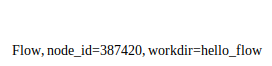

In [520]:
hello_flow.get_graphviz()

#### We also need a function returning two inputs for SCF/NSCF run:

In [521]:
def make_scf_nscf_inputs():
    """
    Build and return two input files for the GS-SCF and the GS-NSCF tasks.
    """
    multi = abilab.MultiDataset(structure="si.cif", pseudos="14si.pspnc", ndtset=2)

    # Set global variables (dataset1 and dataset2)
    multi.set_vars(ecut=6, nband=8)

    # Dataset 1 (GS-SCF run)
    multi[0].set_kmesh(ngkpt=[8, 8, 8], shiftk=[0, 0, 0])
    multi[0].set_vars(tolvrs=1e-6)

    # Dataset 2 (GS-NSCF run on a k-path)
    kptbounds = [
        [0.5, 0.0, 0.0], # L point
        [0.0, 0.0, 0.0], # Gamma point
        [0.0, 0.5, 0.5], # X point
    ]

    multi[1].set_kpath(ndivsm=6, kptbounds=kptbounds)
    multi[1].set_vars(tolwfr=1e-12)
    
    # Return two input files for the GS and the NSCF run
    scf_input, nscf_input = multi.split_datasets()
    return scf_input, nscf_input

#### In terms of factory functions, similar results can be obtained with:

In [522]:
from abipy.abio.factories import ebands_input
scf_input, nscf_input = ebands_input(structure="si.cif", pseudos="14si.pspnc")

#### To add a *Task* we create an *AbinitInput* and we register it in the flow:

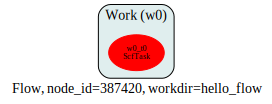

In [523]:
scf_input, nscf_input = make_scf_nscf_inputs()

hello_flow.register_scf_task(scf_input, append=True)
hello_flow.get_graphviz()

#### To select the first *work*:

In [524]:
hello_flow[0]

<Work, node_id=387421, workdir=hello_flow/w0>

#### To select the first *task* of the first *work*:

In [525]:
hello_flow[0][0]

<ScfTask, node_id=387422, workdir=hello_flow/w0/t0>

### How to define dependencies

* Let's add NSCF calculation that depends on the *scf_task* through the DEN file.
* Dependencies are specified via the {*task*: "file_ext"} dictionary

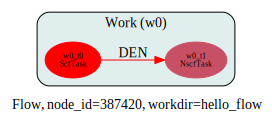

In [526]:
hello_flow.register_nscf_task(nscf_input, deps={hello_flow[0][0]: "DEN"}, 
                              append=True)

hello_flow.get_graphviz(engine="dot")

#### A *Work* is a list of *Tasks* and we can iterate with the syntax:

In [527]:
for task in hello_flow[0]:
    print(task)

<ScfTask, node_id=387422, workdir=hello_flow/w0/t0>
<NscfTask, node_id=387423, workdir=hello_flow/w0/t1>


### A more complicated dependency:

* We want to add another *NscTask* with a different value of bands

* The new task should read the WFK file produced by *w0_t1* 
  and use the DEN file produced by the first task *w0_t0*

```python
    deps = {hello_flow[0][0]: "DEN", hello_flow[0][1]: "WFK"}
```
    
<!--
Excellent, we managed to build our first AbiPy flow with inter-dependent tasks in just six lines of code (including the three calls to graphviz). 

Well, the syntax for the new deps, it's just:

deps = {hello_flow[0][0]: "DEN", hello_flow[0][1]: "WFK"}
but we should also change the input variable nband in the nscf_input before creating the new NscTask (remember that building a Task requires an AbinitInput object and a list of dependencies, if any).

Now there are two ways to increase nband: the wrong way and the correct one! Let's start from the wrong way because it's always useful to learn from our mistakes. Let's print some values just for the record:
-->

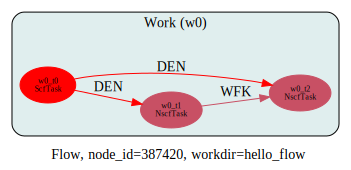

In [528]:
t1 = hello_flow[0][1]

# Copy the input of t1 and change nband
new_input = t1.input.new_with_vars(nband=1000)  

deps = {hello_flow[0][0]: "DEN", hello_flow[0][1]: "WFK"}

hello_flow.register_nscf_task(new_input, deps=deps, append=True)
hello_flow.get_graphviz(engine="dot")

#### Tasks can be connected to external files:

nband in tasks: [8, 10, 20]


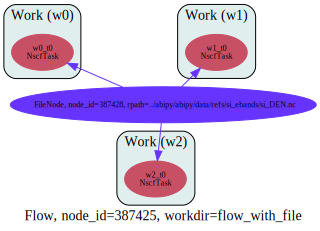

In [529]:
flow_with_file = flowtk.Flow(workdir="flow_with_file")

den_filepath = abidata.ref_file("si_DEN.nc")
flow_with_file.register_nscf_task(nscf_input, deps={den_filepath: "DEN"})

for nband in [10, 20]:
    flow_with_file.register_nscf_task(nscf_input.new_with_vars(nband=nband), 
                                      deps={den_filepath: "DEN"}, append=False)

print("nband in tasks:", [task.input["nband"] for task in flow_with_file.iflat_tasks()])

flow_with_file.get_graphviz()

## Phonon band structure of AlAs

Now we are finally ready for the calculation of the vibrational spectrum of AlAs. 

Once we have a function returning an input for SCF calculations, it's just a matter of 
of passing the SCF input to the *from_scf_input* factory function

In [530]:
def make_scf_input(ecut=2, ngkpt=(4, 4, 4)):
    """
    Generate an `AbinitInput` to perform GS calculation for AlAs.

    Args:
        ecut: Cutoff energy in Ha.
        ngkpt: k-mesh divisions

    Return:
        `AbinitInput` object
    """
    # Initialize the AlAs structure from an internal database. Use the pseudos shipped with AbiPy.
    gs_inp = abilab.AbinitInput(structure="AlAs.cif",
                                pseudos=["13al.pspnc", "33as.pspnc"])

    # Set the value of the Abinit variables needed for GS runs.
    gs_inp.set_vars(
        nband=4,
        ecut=ecut,
        ngkpt=ngkpt,
        nshiftk=4,
        shiftk=[0.0, 0.0, 0.5,   # This gives the usual fcc Monkhorst-Pack grid
                0.0, 0.5, 0.0,
                0.5, 0.0, 0.0,
                0.5, 0.5, 0.5],
        tolvrs=1.0e-10,
    )

    return gs_inp

In [531]:
def build_flow_alas_phonons():
    """
    Build and return a Flow to compute the dynamical matrix on a (2, 2, 2) qmesh
    as well as DDK and Born effective charges.
    The final DDB with all perturbations will be merged automatically and placed
    in the Flow `outdir` directory.
    """
    from abipy import flowtk
    scf_input = make_scf_input(ecut=6, ngkpt=(4, 4, 4))
    return flowtk.PhononFlow.from_scf_input("flow_alas_phonons", scf_input,
                                            ph_ngqpt=(2, 2, 2), with_becs=True)

#####  Abipy will call Abinit to get the list of DFPT perturbations and…

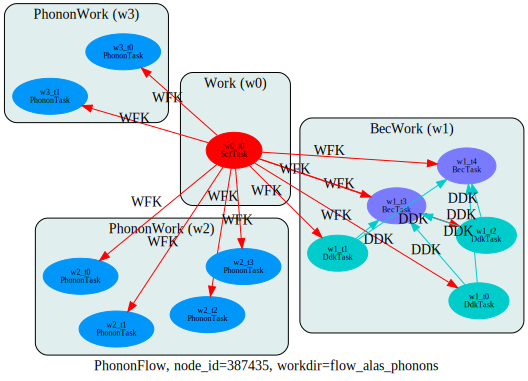

In [532]:
flow_phbands = build_flow_alas_phonons()
flow_phbands.get_graphviz()

#### To execute the flow, use the *abirun.py* script:
    
    abirun.py flow_workdir scheduler


For futher info, see 
[this notebook](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/flows.ipynb)

TODO:
Executing

flow.make_scheduler().start()
inside a jupyter notebook is handy if you are dealing with small calculations that require few seconds or minutes. This approach, however, is unpractical when you have large flows or big calculations requiring hours or days, even on massively parallel machines. In this case, indeed, one would like to run the scheduler in a separate process in the backgroud so that the scheduler is not killed when the jupyter server is closed.

To start the scheduler in a separate process, use the abirun.py script. The syntax is:

abirun.py flow_workdir COMMAND

where flow_workdir is the directory containing the Flow (the directory with the pickle file) and command selects the operation to be performed.

Typical examples:

abirun.py /tmp/hello_bands status

checks the status of the Flow and print the results to screen while

nohup abirun.py /tmp/hello_bands scheduler > sched.log 2> sched.err &

starts the scheduler in the background redirecting the standard output to file sched.log

`nohup` is a standard Unix tool. The command make the scheduler immune to hangups so that you can close the shell session without killing the scheduler.
This brings us to the last and most crucial question. How do we configure AbiPy to run Abinit workflows on different architectures ranging from standard laptops to high-performance supercomputers?

Unfortunately this notebook is already quite long and these details are best covered in a technical documentation. What should be stressed here is that the behaviour can be customized with two Yaml files. All the information related to your environment (Abinit build, modules, resource managers, shell environment) are read from the manager.yml configuration file, that is usually located in the directory ~/.abinit/abipy/ The options for the python scheduler responsible for job submission are given in scheduler.yml.

For a more complete description of these configuration options, please consult the TaskManager documentation. A list of configuration files for different machines and clusters is available here while the Flows HOWTO gathers answers to frequently asked questions.

Last but not least, check out our gallery of AbiPy Flows for inspiration.

<img src="./assets/abiflows_deps.png" width="85%" align="center">

## DFPT workflows with Abiflows, Fireworks and MongoDB

* Databases makes life easier if one has to handle many calculations
* Databases can be used to 

    * start calculations from previous results
    * save the intermediate status of the jobs
    * store the final results

Building an *Abiflows* workflow for DFPT requires:

In [533]:
from pseudo_dojo.core.pseudos import OfficialDojoTable
from abiflows.fireworks.workflows.abinit_workflows import PhononFullFWWorkflow 

# Pseudopotential table from the PseudoDojo package
pseudo_table = OfficialDojoTable.from_dojodir('ONCVPSP-PBEsol-PDv0.4','standard')

# Create fireworks workflow with default settings
structure = abilab.Structure.from_file("si.cif")
wf = PhononFullFWWorkflow.from_factory(structure=structure, pseudos=pseudo_table)

### The dependency graph is similar to the ligthweigh version discussed before:

<img src="./assets/abiflows_workflow.png" width="95%" align="center">

<img src="./assets/fw_model.png" width="25%" align="center">

##### but now one can take advantage of MongoDb to run many calculations in a full automatic way:


```python
from abiflows.fireworks.workflows.abinit_workflows import *
from abiflows.database.mongoengine.utils import DatabaseData
from abiflows.database.mongoengine.abinit_results import RelaxResult
from pseudo_dojo.core.pseudos import OfficialDojoTable

# Pseudopotential Table from PseudoDojo
pseudo_table = OfficialDojoTable.from_dojodir('ONCVPSP-PBEsol-PDv0.4','standard')

# Database with relaxed structures
source_db = DatabaseData(host='database_address', port=27017, 
                         collection='collection_name_used_for_relax', 
                         database='database_used_to_store_relax_calc')

# Database used to store DFPT results.
db = DatabaseData(host='database_address', port=27017, collection='phonon_bs', 
                  database='database_name_eg_phonons')

# Connect to the database
source_db.connect_mongoengine()

# Download relaxed structure from the database.
with source_db.switch_collection(RelaxResult) as RelaxResult:
    relaxed_structure = RelaxResult.objects(mp_id="mp-149")[0].structure

wf = PhononFullFWWorkflow.from_factory(structure=structure, pseudos=pseudo_table)

wf.add_mongoengine_db_insertion(db)
wf.add_final_cleanup(["WFK", "1WF", "WFQ", "1POT", "1DEN"])
wf.add_to_db()
```

<img src="./assets/mongoengine_logo.png" width="50%" align="center">

#### Document-Object Mapper 

   * Like ORM but for document databases
   * Mixins for standard quantities
   * Document associated with workflows
   * Standardized output

abiflows.database.mongoengine modules:

In [534]:
# DateMixin = DirectoryMixin = Document = object

class MaterialMixin(object):
    """
    fields describing the material examined in the calculation
    """

#class PhononResult(MaterialMixin, DateMixin, DirectoryMixin, Document):
#    """
#    results for a phonon workflow
#    """

### How to recostruct AbiPy objects from a MondoDb database
<hr>

```python

from abiflows.database.mongoengine.abinit_results import PhononResult

# Find results for SiC
r = PhononResult.objects(mp_id='mp-8062')[0] 

# Get DDB object from the database.
with r.abinit_output.ddb.abiopen() as ddb: 
    
    # Run anaddb 
    phbst, phdos = ddb.anaget_phbst_and_phdos_files(ngqpt=[8, 8, 5]) 
   
    # Use AbiPy API
    phbst.phbands.plot_with_phdos(phdos.phdos, units='cm-1')
```

## GW calculations with AbiPy

<img src="./assets/hedin_equations.png" width="75%" height="30%" align="center">

* Many-body approach to compute band gaps and **charged** excitation energies associated to $|N, {\text{GS}} \rangle \rightarrow |N \pm 1, j\rangle$ transitions with clamped ions

* Hedin's equations are usually solved within the so-called **one-shot** $G_0W_0$ approximation (one iteration of the equations in the right panel) 

* **More accurate** than Kohn-Sham theory but also **more expensive** and more difficult to converge 

<img src="./assets/gw_flowchart.png" width="95%" heigh="40%" align="center">

### Interpolating $GW$ corrections with AbiPy

We can only compute QP energies for k-points belonging to the k-mesh of the input WFK file while we usually discuss electronic properties in terms of band energies along a high-symmetry k-path. 

Here we use the Fourier interpolation scheme proposed by Shankland-Koelling-Wood (SKW) in PRB 38 2721. The idea is relatively simple: the QP corrections have the same symmetry of the KS energies, we can thus interpolate the QP corrections with SKW and then apply the interpolated corrections to the ab-initio KS energies obtained along a path.

sigres = abilab.abiopen("flow_g0w0/w1/t2/outdata/out_SIGRES.nc")

It's just a matter of passing the KS band structure to the sigres.interpolate method to activate this procedure:

r = sigres.interpolate(lpratio=5, ks_ebands_kpath=ks_ebands_kpath)

The interpolated QP band structure is available in r.qp_ebands_kpath 
and we can plot the interpolated data with:

r.qp_ebands_kpath.plot();

The results make sense but it would be nice if one could compare the (interpolated) QP bands with the KS energies. Fortunately, we can use the AbiPy ElectronBandsPlotter to compare multiple band structures:

p = abilab.ElectronBandsPlotter()
p.add_ebands("LDA", ks_ebands_kpath)
p.add_ebands("GW (interpolated)", r.qp_ebands_kpath)
p.combiplot();

Do you need to compare the band dispersion given by KS and GW?

By default, the two band energies are shifted with respect to *their* fermi level.
Use e=0 if you do not want to shift the eigenvalues
so that it is possible to visualize the QP corrections.

p.combiboxplot();

The same approach can be used to interpolate QP band structures and QP DOSes. We only need to pass an additional KS band structure with energies in the IBZ:

r2 = sigres.interpolate(lpratio=5, ks_ebands_kpath=ks_ebands_kpath, 

and then compute the QP DOS with:

qp_edos = r2.qp_ebands_kmesh.get_edos()


Did I tell you that ElectronBandsPlotter accepts DOSes as well?

p2 = abilab.ElectronBandsPlotter()
p2.add_ebands("LDA", ks_ebands_kpath, edos=ks_edos)
p2.add_ebands("GW (interpolated)", r.qp_ebands_kpath, edos=qp_edos)
p2.combiplot();

## Conclusion

* The *ab-initio* community is migrating to *python* to implement:

    * Pre-processing and post-processing tools
    * Web-based technologies to analyze/visualize data (*e.g.* *jupyter* notebooks …) 
    * High-level logic for scientific workflows and *high-throughput* applications
    
* <u>Difficulties</u> for users:

    * Installation of big software stack (C, C++, Fortran, Python, Javascript …)
    * Multiple technologies under the hood (databases, *JSON*, *HDF5*, *MPI/OMP* …) 
    * Users are supposed to be familiar with programming techniques

* <u>Advantages</u> for users:
    
    * Traditional GUIs are still useful but researchers sometimes need programmatic 
      interfaces to analyze raw data
    * Several *python* packages to boost productivity and do better science


> "An investment in knowledge pays the best interest" (B. Franklin)